In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

In [2]:
# Read the data
df=pd.read_csv('data/transactions_processed.csv',parse_dates=['transactionDateTime'])

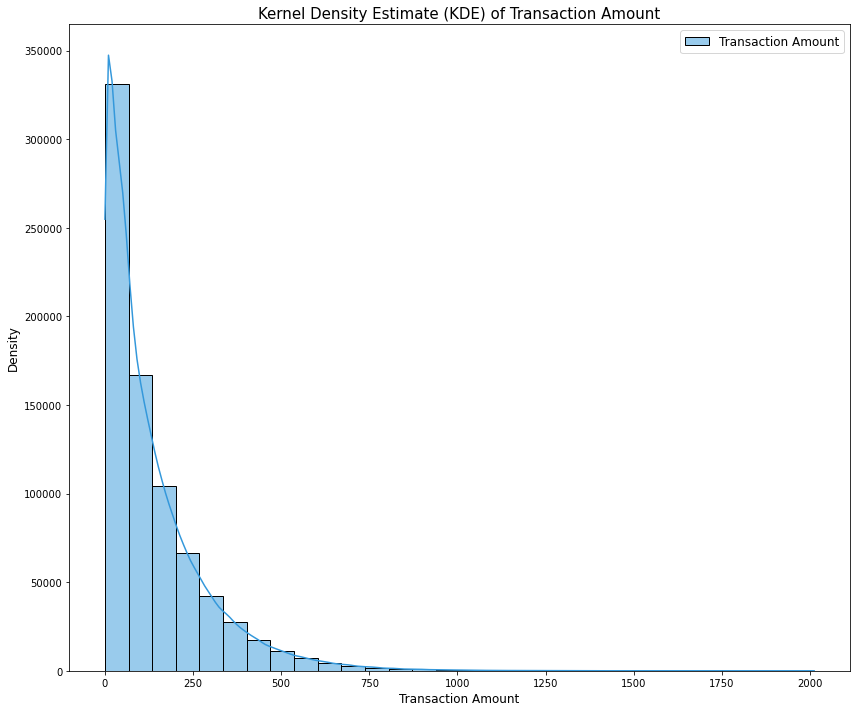

In [3]:
# Plot the histogram of the processed amounts of each transaction, the transactionAmount column
# Make kernel density estimate plots of transaction amount
plt.figure(figsize=(12, 10))
# Taking 30 bins
# KDE plot of transactions with outliers
sns.histplot(df['transactionAmount'], kde=True, bins=30, color='#3498db', label='Transaction Amount')
plt.title('Kernel Density Estimate (KDE) of Transaction Amount', fontsize=15)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('figs/transactionAmount_plot.png')

In [4]:
len(df[df['transactionAmount']<=136.98])/len(df)*100

64.03671078115323

In [5]:
len(df[df['transactionAmount']<=87.9])/len(df)*100

50.000699422531326

#### From our previous notebook, we saw that mean transaction amount was 136.98 with median being  87.9. We had hypothesized based on these numbers that there is a right skew in the distribution. The above histogram proves the fact.

Also, we find that about 64.03 % of cases have transaction amount <= 136.98 and about 50% of cases have transaction amount <=87.9

Having looked into this, let's explore the fraud cases a bit more

# Visualizing Frauds with other columns

#### First, let us look at the raw number of fraud vs non fraud

In [6]:
df['isFraud'].value_counts()

False    773946
True      12417
Name: isFraud, dtype: int64

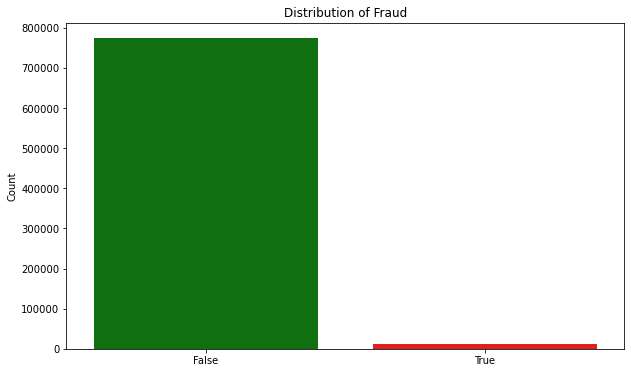

In [3]:
# Count the occurrences of each value in 'isFraud'
frauds = df['isFraud'].value_counts()
# Create a bar plot with different colors and adjusted bar width
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=[0, 1], y=frauds, palette=['green', 'red'])

# Adjust the bar width
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    #ax.annotate(f'{height}', (x + width/2, y + height), ha='center')

plt.xticks(ticks=[0, 1], labels=['False', 'True'])
plt.ylabel('Count')
plt.title('Distribution of Fraud')
plt.savefig('figs/fraud_distribution.png')


#### We can see that it is a highly imbalanced dataset. Now, we explore the distribution of frauds over each month.

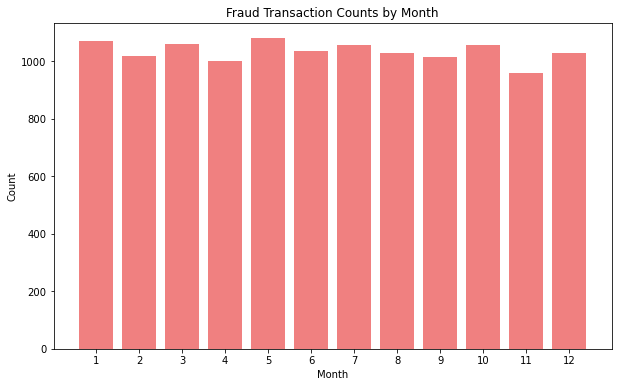

In [7]:
# Convert 'transactionDateTime' to datetime if not already done
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])

# Extract month from 'transactionDateTime'
df['transactionMonth'] = df['transactionDateTime'].dt.month

# Filter data for isFraud=True
fraud_data = df[df['isFraud']]

# Create a histogram of isFraud=True counts over the months
plt.figure(figsize=(10, 6))
plt.bar(fraud_data['transactionMonth'].value_counts().index, fraud_data['transactionMonth'].value_counts().values, color='lightcoral')
plt.title('Fraud Transaction Counts by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(1, 13))
plt.savefig('figs/Fraud_distribution_month.png')


In [8]:
min(fraud_data['transactionMonth'].value_counts())

959

In [9]:
max(fraud_data['transactionMonth'].value_counts())

1081

#### It seems that the distribution of cases is pretty even over months. Now, let us try to explore the relationship between transaction amount, transaction type and if fraud or not.

In [5]:
len(df[(df['isFraud']==True)&(df['transactionType']=='REVERSAL')])

337

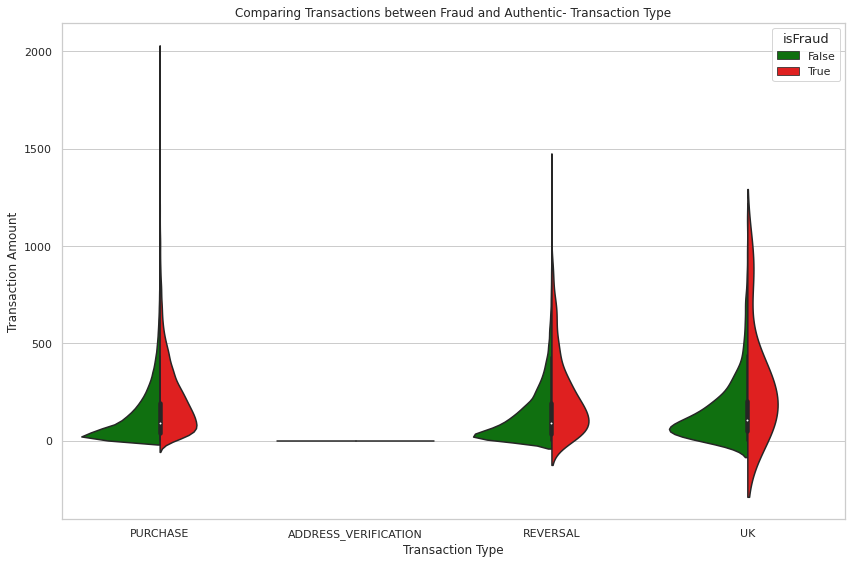

In [6]:
# Set a Seaborn style
sns.set(style="whitegrid")

# Set a color palette
palette = {True: 'red', False: 'green'}

# Create a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, y='transactionAmount', x='transactionType', hue='isFraud', split=True, palette=palette)
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.title('Comparing Transactions between Fraud and Authentic- Transaction Type')
plt.legend(title='isFraud', title_fontsize='13', loc='upper right')
plt.tight_layout()
plt.savefig('figs/violin_fraud_amt_type.png')

#### Some observations are:
1. Fraudulent transactions seem to have higher transaction amounts than non-fraudulent transactions. This makes sense as frauds should be made on higher transaction amounts leading to higher profits for the malicious entity.
2. Fraudulent Transactions are more common in puchase transactions than reversal

Let us now try to look if any patterns exist in the credit limit at all.

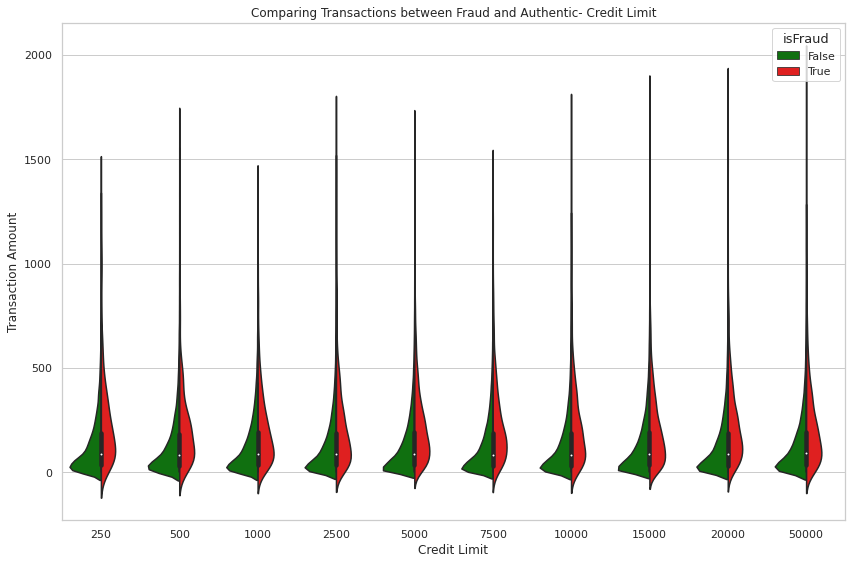

In [10]:
# Set a Seaborn style
sns.set(style="whitegrid")

# Set a color palette
palette = {True: 'red', False: 'green'}

# Create a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, y='transactionAmount', x='creditLimit', hue='isFraud', split=True, palette=palette)
plt.xlabel('Credit Limit')
plt.ylabel('Transaction Amount')
plt.title('Comparing Transactions between Fraud and Authentic- Credit Limit')
plt.legend(title='isFraud', title_fontsize='13', loc='upper right')
plt.tight_layout()
plt.savefig('figs/violin_fraud_amt_credit.png')

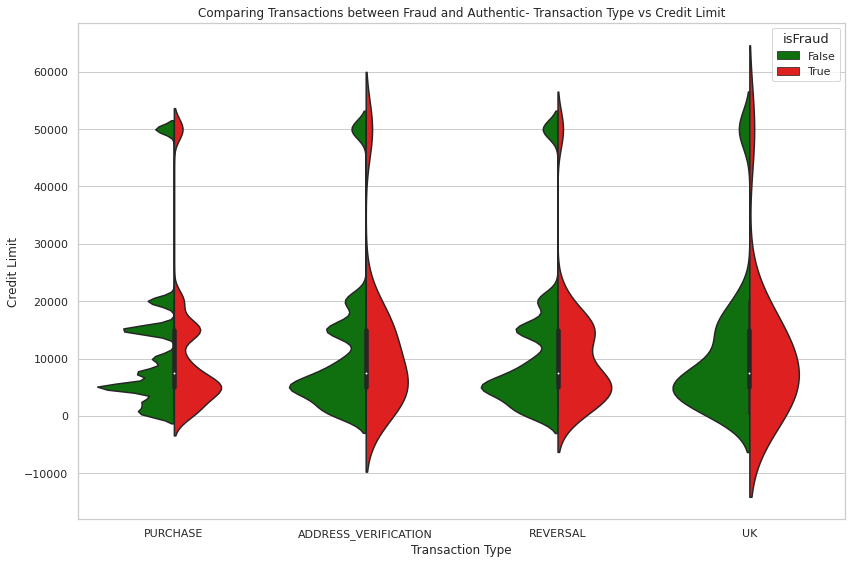

In [8]:
# Set a Seaborn style
sns.set(style="whitegrid")

# Set a color palette
palette = {True: 'red', False: 'green'}

# Create a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='transactionType', y='creditLimit', hue='isFraud', split=True, palette=palette)
plt.xlabel('Transaction Type')
plt.ylabel('Credit Limit')
plt.title('Comparing Transactions between Fraud and Authentic- Transaction Type vs Credit Limit')
plt.legend(title='isFraud', title_fontsize='13', loc='upper right')
plt.tight_layout()
plt.savefig('figs/violin_fraud_type_credit.png')

#### We make the following observations:
1. Over the different credit limits, fraudulent transactions had the same distribution over transaction amount
2. But, as we can see from the other violin plot, the distribution of instances of PURCHASE type had more variability had more peaks in 0-10000 than other transaction types indicating that this subset of the data will be harder to predict  

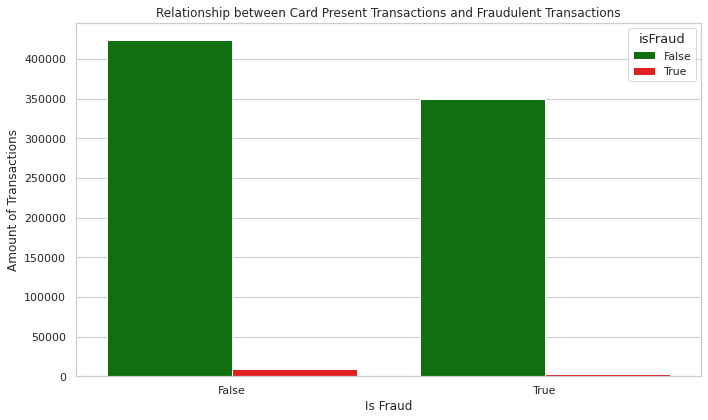

In [9]:
# Set a Seaborn style
sns.set(style="whitegrid")

# Set a color palette
palette = {True: 'red', False: 'green'}

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cardPresent', hue='isFraud', palette=palette)
plt.xlabel('Is Fraud')
plt.ylabel('Amount of Transactions')
plt.title('Relationship between Card Present Transactions and Fraudulent Transactions')
plt.legend(title='isFraud', title_fontsize='13', loc='upper right')
plt.tight_layout()
plt.savefig('figs/card_present_fraud.png')

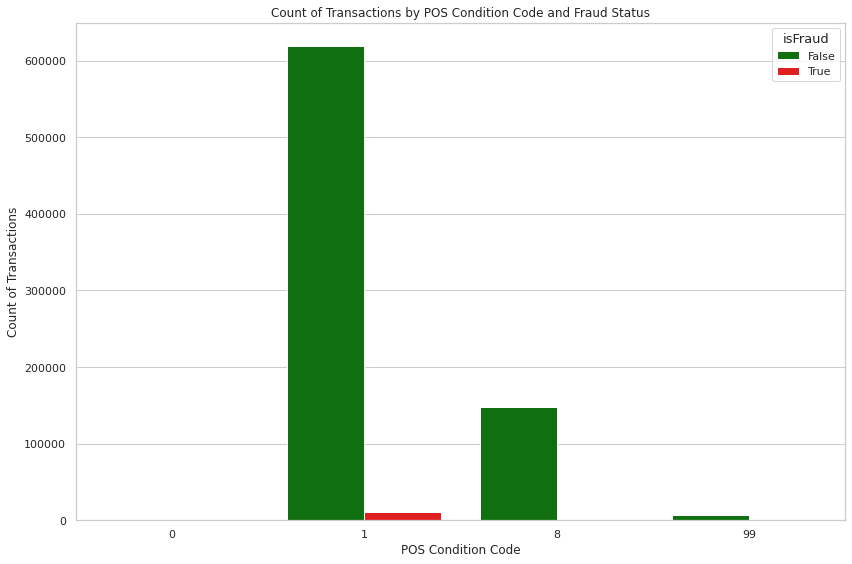

In [10]:
# Set a Seaborn style
sns.set(style="whitegrid")

# Set a color palette
palette = {True: 'red', False: 'green'}

# Create a count plot
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='posConditionCode', hue='isFraud', palette=palette)
plt.xlabel('POS Condition Code')
plt.ylabel('Count of Transactions')
plt.title('Count of Transactions by POS Condition Code and Fraud Status')
plt.legend(title='isFraud', title_fontsize='13', loc='upper right')
plt.tight_layout()
plt.savefig('figs/POS_Condition_isFraud.png')

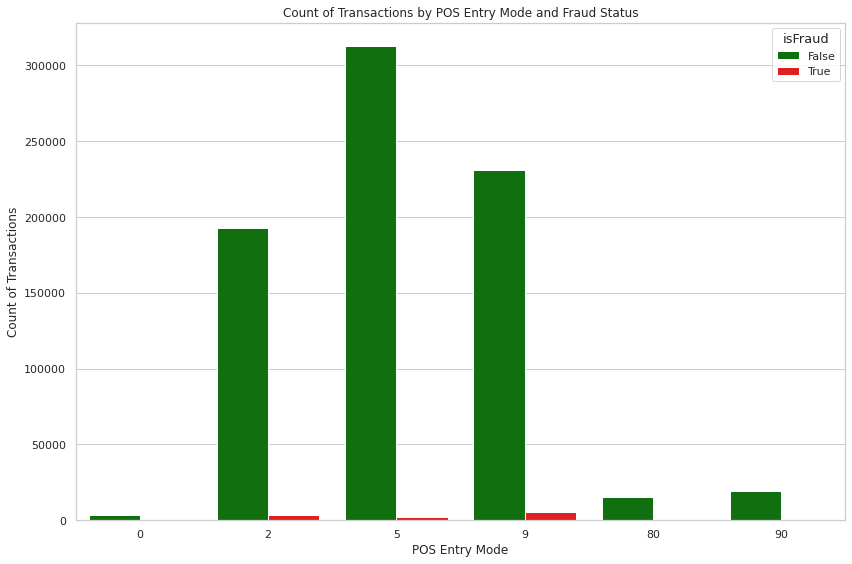

In [11]:
# Set a Seaborn style
sns.set(style="whitegrid")

# Set a color palette
palette = {True: 'red', False: 'green'}

# Create a count plot
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='posEntryMode', hue='isFraud', palette=palette)
plt.xlabel('POS Entry Mode')
plt.ylabel('Count of Transactions')
plt.title('Count of Transactions by POS Entry Mode and Fraud Status')
plt.legend(title='isFraud', title_fontsize='13', loc='upper right')
plt.tight_layout()
plt.savefig('figs/POS_entry_isFraud.png')

#### We cannot infer any patterns with card-present or not for fraud and non-fraud as the distributions are pretty much the same. We also do not see any pattern for posConditionCode or posEntryMode

# Analyses of Distribution of other columns

/home/choudhuri/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/choudhuri/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/choudhuri/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<Figure size 2160x1440 with 0 Axes>

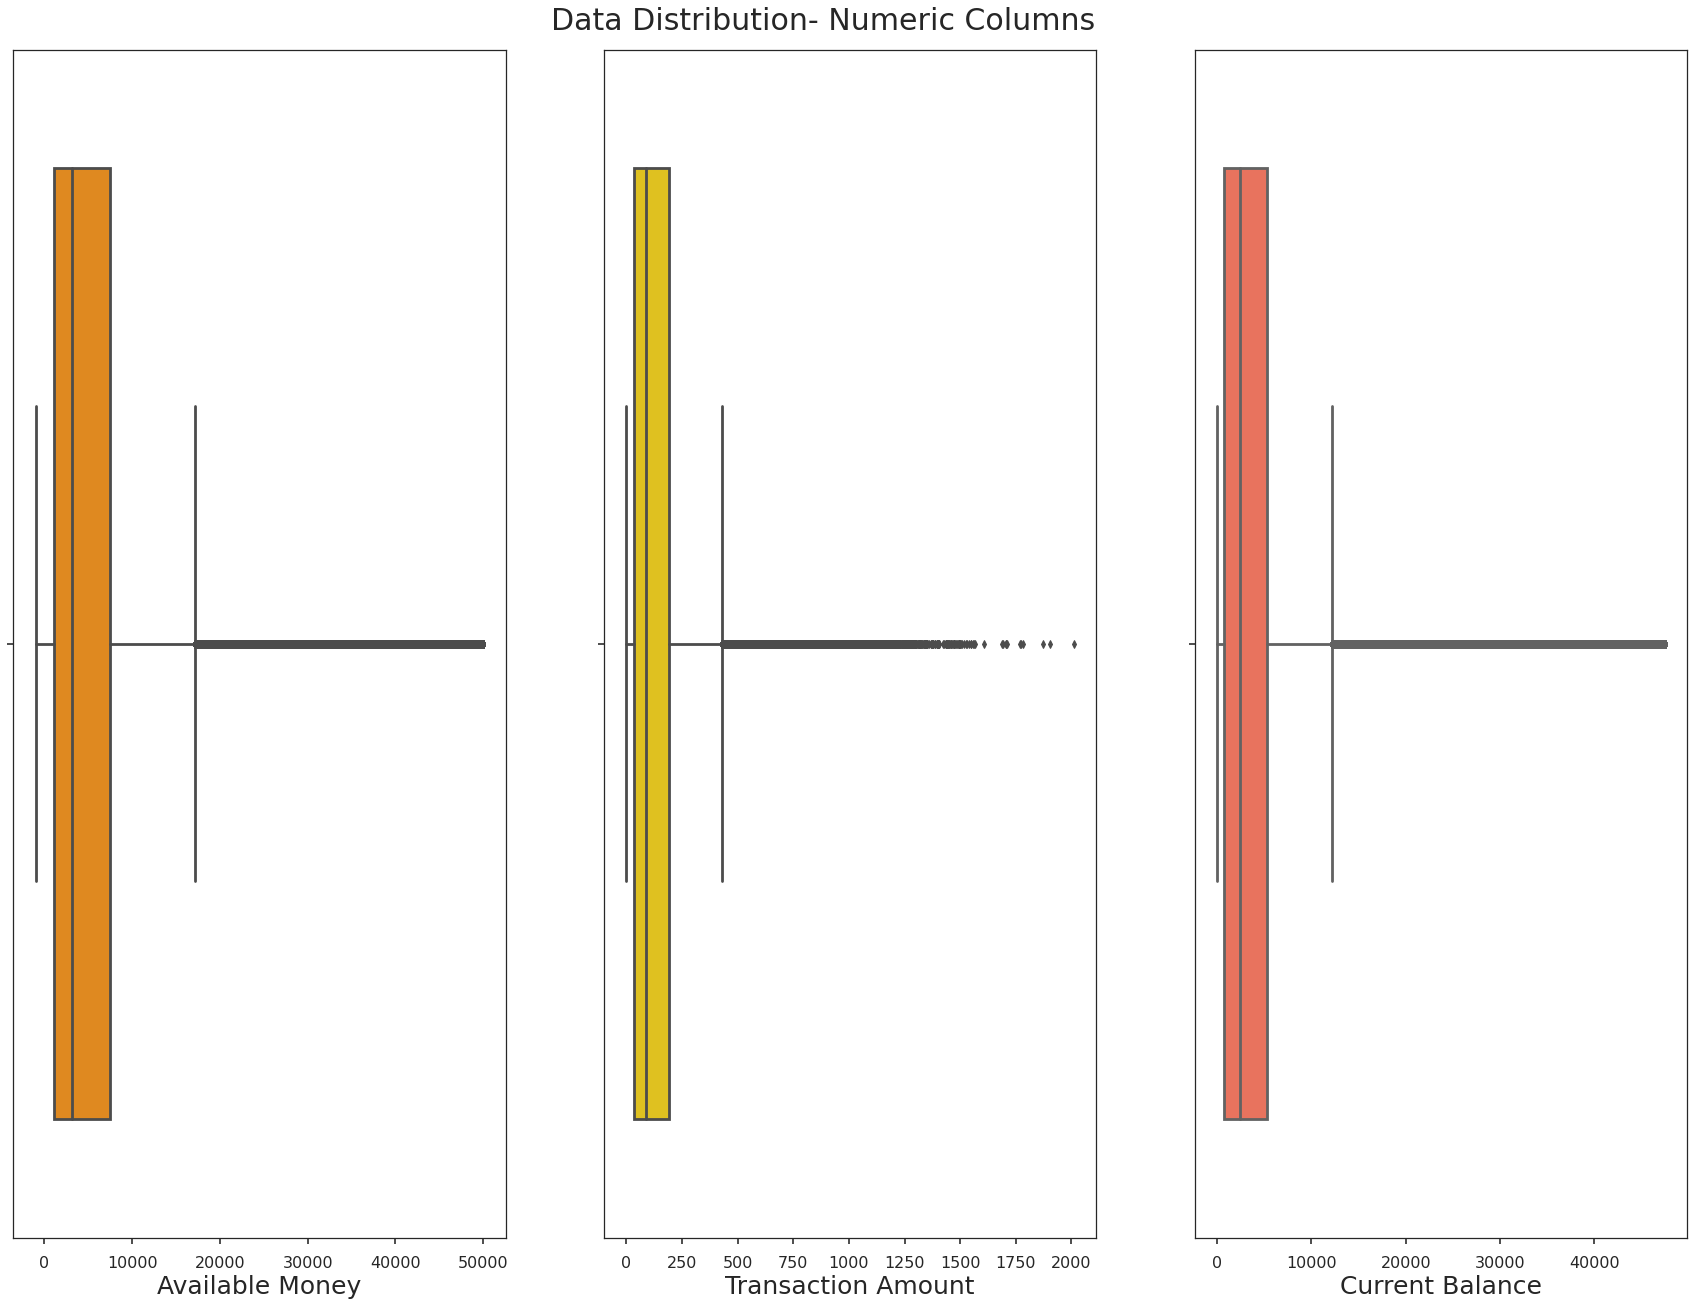

In [12]:
plt.figure(figsize=(30, 20))  # Set the figure size here

style.use('seaborn-poster')
sns.set_style('ticks')

numeric_cols = ['availableMoney', 'transactionAmount', 'currentBalance']
neat_cols = ['Available Money', 'Transaction Amount', 'Current Balance']
colors = ['#FF8C00', '#FFD700', '#FF6347']  # Custom colors

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 20))  # Use the same figsize here

for i in range(len(numeric_cols)):
    sns.boxplot(data=df, x=numeric_cols[i], ax=ax[i], color=colors[i], orient='v')
    ax[i].set_xlabel(neat_cols[i], fontsize=25)
    ax[i].set_ylabel('')

plt.suptitle('Data Distribution- Numeric Columns', fontsize=30)
fig.subplots_adjust(top=0.95)

plt.savefig('figs/boxplots.png')

#### All 3 distributions seem to be skewed to the right.
1. Available Money has much more outliers which reflects some customers' habit of not spending too much beyond their credit limits.
2. The overall Transaction Amount maximum amount is really low, which is surprising as we expect persons with highercredit limits to spend more than 2000.

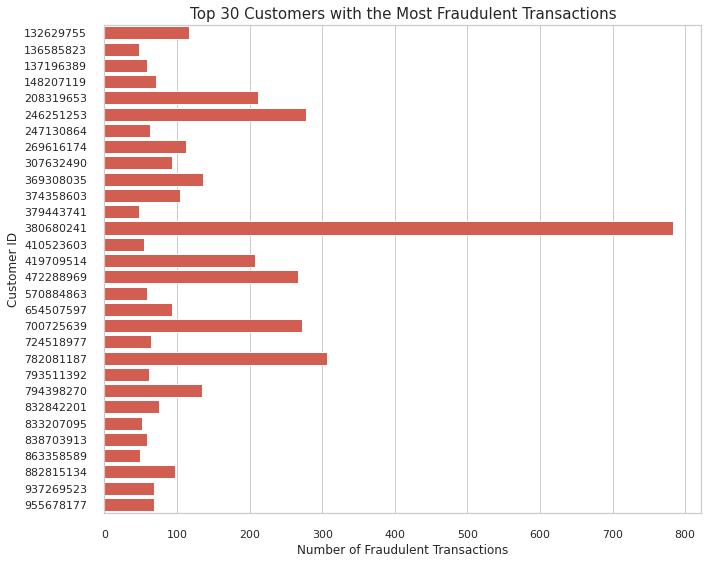

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Select only fraudulent transactions
fraudulent_transactions = df[df['isFraud']]

# Get the top 30 fraudulent accounts (sorted in descending order)
top30_fraudulent_accounts_s = fraudulent_transactions['customerId'].value_counts().sort_values(ascending=False).head(30)
top30_fraudulent_accounts = pd.DataFrame()
top30_fraudulent_accounts['CustomerID'] = top30_fraudulent_accounts_s.index
top30_fraudulent_accounts['values'] = top30_fraudulent_accounts_s.values
top30_fraudulent_accounts.sort_values('values', ascending=False, inplace=True)

# Plot the bar chart
plt.figure(figsize=(10, 8))
ax = sns.barplot(y=top30_fraudulent_accounts['CustomerID'].tolist(), x=top30_fraudulent_accounts['values'].tolist(), color='#e74c3c', orient='h')

plt.ylabel('Customer ID', fontsize=12)
plt.xlabel('Number of Fraudulent Transactions', fontsize=12)
plt.title('Top 30 Customers with the Most Fraudulent Transactions', fontsize=15)

plt.tight_layout()
plt.savefig('figs/top_fraudulent_accounts.png')

In [17]:
top30_fraudulent_accounts

,CustomerID,values
0,380680241,783
1,782081187,307
2,246251253,278
3,700725639,272
4,472288969,266
5,208319653,211
6,419709514,207
7,369308035,136
8,794398270,135
9,132629755,116


#### We can see that the highest number of fraudulent transactionswere made by Customer ID 380680241 which is alarmingly high. But overall, 12 people had more than 100 fraud transactions.
Let us look at the places Customer ID 380680241 did the most number of fraudulent transactions with next.

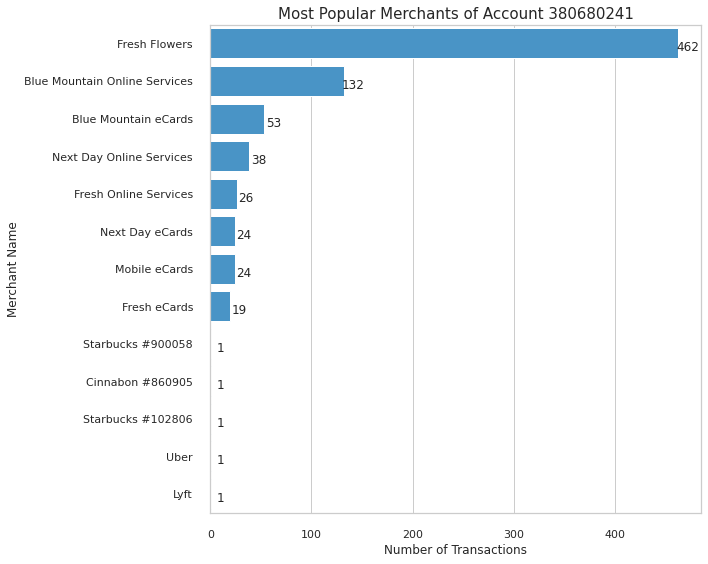

In [18]:
# Set Seaborn style
sns.set(style="whitegrid")

# Assuming df, top30_fraudulent_accounts, and top_fraud_top_merchants are already defined

# Select the top fraudulent account
top_fraud = top30_fraudulent_accounts['CustomerID'][0]

# Filter data for the top fraudulent account with fraud transactions
top_fraud_data = df[(df['customerId'] == top_fraud) & (df['isFraud'] == True)]

# Get the top merchants for the top fraudulent account
top_fraud_top_merchants = top_fraud_data['merchantName'].value_counts()

# Plot the bar chart with consistent colors
plt.figure(figsize=(10, 8))
ax = sns.barplot(y=list(range(len(top_fraud_top_merchants))), x=top_fraud_top_merchants.values, color='#3498db', orient='h')

# Display raw values next to the bars
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 9.5,
            p.get_y() + p.get_height() / 2. + 0.2,
            int(width),
            ha="center", fontsize=12)

plt.yticks(ticks=list(range(len(top_fraud_top_merchants))), labels=top_fraud_top_merchants.index.tolist())
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Merchant Name', fontsize=12)
plt.title(f'Most Popular Merchants of Account {top_fraud}', fontsize=15)

plt.tight_layout()
plt.savefig('figs/Fraud_main_transactions.png')

#### We see that fresh flowers was the most popular fraud location for this Customer.
Let us also find which merchant had the most number of fraudulent transactions.

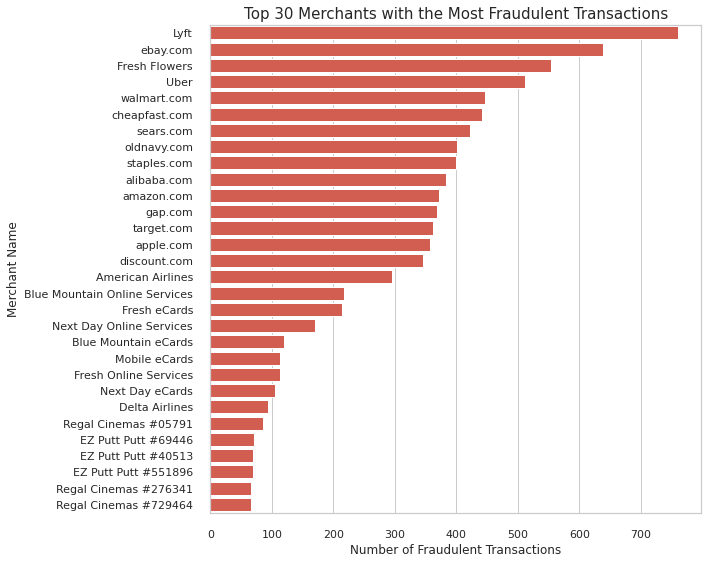

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Select only fraudulent transactions
fraudulent_transactions = df[df['isFraud']]

# Get the top 30 fraudulent accounts (sorted in descending order)
top30_fraudulent_accounts_s = fraudulent_transactions['merchantName'].value_counts().sort_values(ascending=False).head(30)
top30_fraudulent_accounts = pd.DataFrame()
top30_fraudulent_accounts['merchantName'] = top30_fraudulent_accounts_s.index
top30_fraudulent_accounts['values'] = top30_fraudulent_accounts_s.values
top30_fraudulent_accounts.sort_values('values', ascending=False, inplace=True)

# Plot the bar chart
plt.figure(figsize=(10, 8))
ax = sns.barplot(y=top30_fraudulent_accounts['merchantName'].tolist(), x=top30_fraudulent_accounts['values'].tolist(), color='#e74c3c', orient='h')

plt.ylabel('Merchant Name', fontsize=12)
plt.xlabel('Number of Fraudulent Transactions', fontsize=12)
plt.title('Top 30 Merchants with the Most Fraudulent Transactions', fontsize=15)

plt.tight_layout()
plt.savefig('figs/top_fraudulent_merchant.png')

#### We can see that Lyft had the most number of Fraudulent Transactions followed by ebay and fresh flowers